In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
customers = pd.read_csv('data/customer_data.csv')
customers.head()

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [102]:
sales = pd.read_csv('data/sales_data.csv')
sales.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon


In [103]:
print(customers.shape)
customers.dtypes

(99457, 4)


customer_id        object
gender             object
age               float64
payment_method     object
dtype: object

In [104]:
print(sales.shape)
sales.dtypes

(99457, 7)


invoice_no        object
customer_id       object
category          object
quantity           int64
price            float64
invoice_date      object
shopping_mall     object
dtype: object

In [108]:
sales['invoice_date'] = pd.to_datetime(sales['invoice_date'], dayfirst=True)

In [109]:
customers.describe()

,age
count,99338.000000
mean,43.425859
std,14.989400
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,69.000000


In [110]:
customers.isna().sum()

customer_id         0
gender              0
age               119
payment_method      0
dtype: int64

In [111]:
sales.isna().sum()

invoice_no       0
customer_id      0
category         0
quantity         0
price            0
invoice_date     0
shopping_mall    0
dtype: int64

In [112]:
full_df = sales.merge(customers, on='customer_id', how='inner')
print(full_df.shape)
full_df.head()

(99457, 10)


,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,2022-08-05,Kanyon,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,2021-12-12,Forum Istanbul,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,2021-11-09,Metrocity,Male,20.0,Cash
3,I173702,C988172,Shoes,5,3000.85,2021-05-16,Metropol AVM,Female,66.0,Credit Card
4,I337046,C189076,Books,4,60.60,2021-10-24,Kanyon,Female,53.0,Cash


<Axes: xlabel='payment_method'>

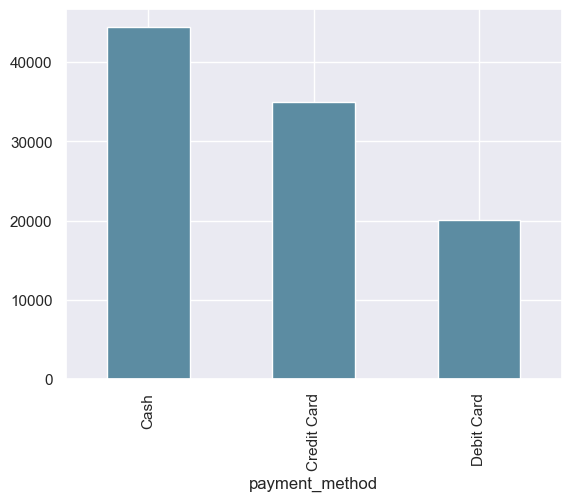

In [113]:
full_df['payment_method'].value_counts().plot(kind='bar')

In [114]:
bins = list(range(10, 71, 10))
labels = [str(x)+'-'+str(bins[i+1]) for i, x in enumerate(bins) if bins[i] != bins[-1]]
labels

['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

In [115]:
full_df['age_group'] = pd.cut(full_df['age'], bins=bins, labels=labels)
full_df.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method,age_group
0,I138884,C241288,Clothing,5,1500.40,2022-08-05,Kanyon,Female,28.0,Credit Card,20-30
1,I317333,C111565,Shoes,3,1800.51,2021-12-12,Forum Istanbul,Male,21.0,Debit Card,20-30
2,I127801,C266599,Clothing,1,300.08,2021-11-09,Metrocity,Male,20.0,Cash,10-20
3,I173702,C988172,Shoes,5,3000.85,2021-05-16,Metropol AVM,Female,66.0,Credit Card,60-70
4,I337046,C189076,Books,4,60.60,2021-10-24,Kanyon,Female,53.0,Cash,50-60


In [116]:
full_df.groupby('age_group').agg({'price': 'mean', 'quantity': 'mean'})

,price,quantity
age_group,,
10-20,668.350830,2.988072
20-30,692.939300,3.008773
30-40,687.048416,3.003066
40-50,696.714801,2.997375
50-60,686.563453,3.010472
60-70,689.341074,3.002041


No significant difference in price and quantity

In [117]:
full_df['invoice_date'].min()

Timestamp('2021-01-01 00:00:00')

<Figure size 640x480 with 0 Axes>

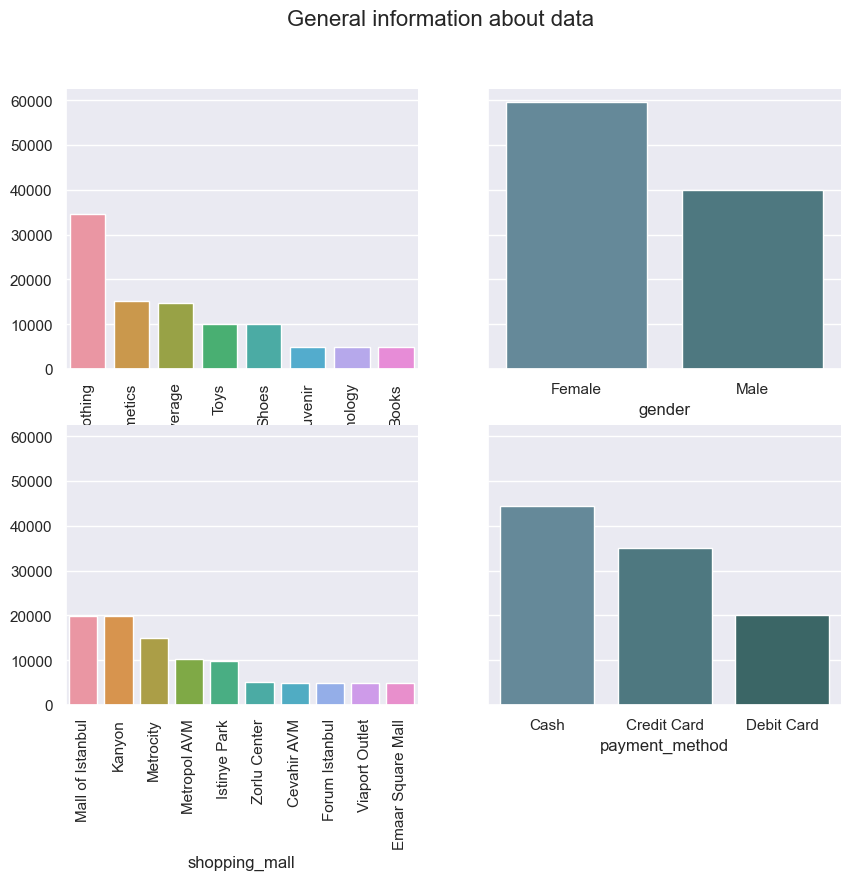

In [118]:
ctg_count = full_df['category'].value_counts()
gender_count = full_df['gender'].value_counts()
mall_count = full_df['shopping_mall'].value_counts()
payment_count = full_df['payment_method'].value_counts()

plt.tight_layout()
sns.set(palette=sns.cubehelix_palette(start=5, light=0.5))
fig, axs = plt.subplots(2,2, sharey=True, figsize=(10, 8))

fig.suptitle('General information about data', fontsize=16)
bar1 = sns.barplot(ax=axs[0, 0], x=ctg_count.index, y=ctg_count.values)
bar2 = sns.barplot(ax=axs[0, 1],x=gender_count.index, y=gender_count.values)
bar3 = sns.barplot(ax=axs[1, 0],x=mall_count.index, y=mall_count.values)
bar4 = sns.barplot(ax=axs[1, 1],x=payment_count.index, y=payment_count.values)

bar1.set_xticks(ticks=bar1.get_xticks(), rotation=90, labels=bar1.get_xticklabels())
bar3.set_xticks(ticks=bar3.get_xticks(), rotation=90, labels=bar3.get_xticklabels())

sns.despine()

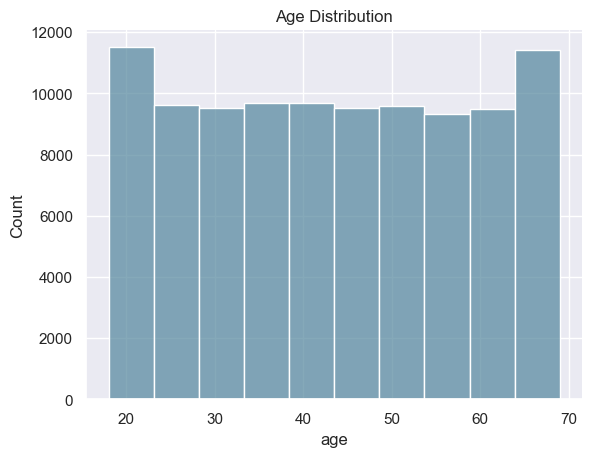

In [121]:
sns.histplot(full_df, x='age', bins=10)
plt.title('Age Distribution')
sns.despine()

Signature:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)
Source:   
def set_theme(context="notebook", style="darkgrid", palette="deep",
              font="sans-serif", font_scale=1, color_codes=True, rc=None):
    """
    Set aspects of the visual theme for all matplotlib and seaborn plots.

    This function changes the global defaults for all plots using the
    matplotlib rcParams system. The themeing is decomposed into several distinct
    sets of parameter values.

    The options are illustrated in the :doc:`aesthetics <../tutorial/aesthetics>`
    and :doc:`color palette <../tutorial/color_palettes>` tutorials.

    Parameters
    ----------
    context : string or dict
        Scaling parameters, see :func:`plotting_context`.
    style : string or dict
        Axes style parameters, see :func:`axes_style`.
    palette : string or sequence
        Color palette, see 

In [61]:
sns.cubehelix_palette(start=s, light=1, as_cmap=True)axs

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [ ]:
?